In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Global Trade Data

## Description of the Data

The dataset was currated by the World Trade Organization and consists of import and export data. 

#### TODO

## Problem Statement

How can we use this dataset to better understand the global trade network. Before acquiring the data we were interested in a plethora of questions including: 
- how interconnected is the network, can we view disruptive historical events in the data,
- do countries from similar geographic locations tend to form communities, 
- who are the major players in global trade, 
- has the network become more integrated through time because of globalization, 
- can we predict the value of goods for different countries and commodities 
- which countries trade which types of commodities.

Once we began looking more closely at the data we began to realize its limitations. In this report we will describe our process for data exploration which forced us to limit the possibile problems we could solve. Given the limitations the problem statement we will focus on is ______ . The focus of this report will be on our process for data exploration and analysis, rather than just our results. 

#### First we imported and explored the data

In [2]:
def pie_with_legend(data_2, upp_leg=1.3):
    fig = plt.figure()
    ax = plt.subplot(111)

    plot = data_2.plot.pie(y='Value', figsize=(15, 15), ax=ax)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, upp_leg),
              ncol=3, fancybox=True, shadow=True)

def fun_plots(data):
    grouped_by_year = data.groupby('Year').sum()
    grouped_by_year.plot(figsize=(15,7));

    grouped_by_year_merch = data.groupby(['Year', 'Indicator_description']).sum()
    grouped_by_year_merch['Value'].unstack().plot(figsize=(20,20))

    merch_totals = data.groupby('Indicator_description').sum()
    pie_with_legend(merch_totals)
    
    
data = pd.read_csv('./data/merchandise_values_annual_dataset.csv', encoding = "ISO-8859-1")

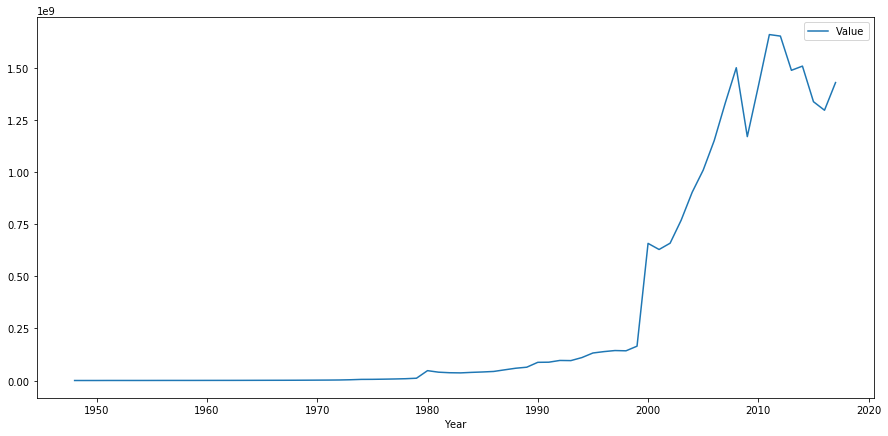

In [8]:
# fun_plots(data)
grouped_by_year = data.groupby('Year').sum()
grouped_by_year.plot(figsize=(15,7));

The graph above shows the sum total of goods traded in USD from 1948 - 2017. Just from this graph we can see some interesting things. The value of goods traded rose significantly in the year 2000. This could be either from a true increase in traded value, or it could be due to an increase in reporting. We believe the latter is more likely. Another interesting point in time is the dip just before 2000. This could also be reporting error, but it is notable that the dip occurs at the same time as the 2008 financial CRASH. Finally, after the year 2008 the value of goods traded rises but then trends downwards before beginning to rise again. Further explortation could help us to understand why.

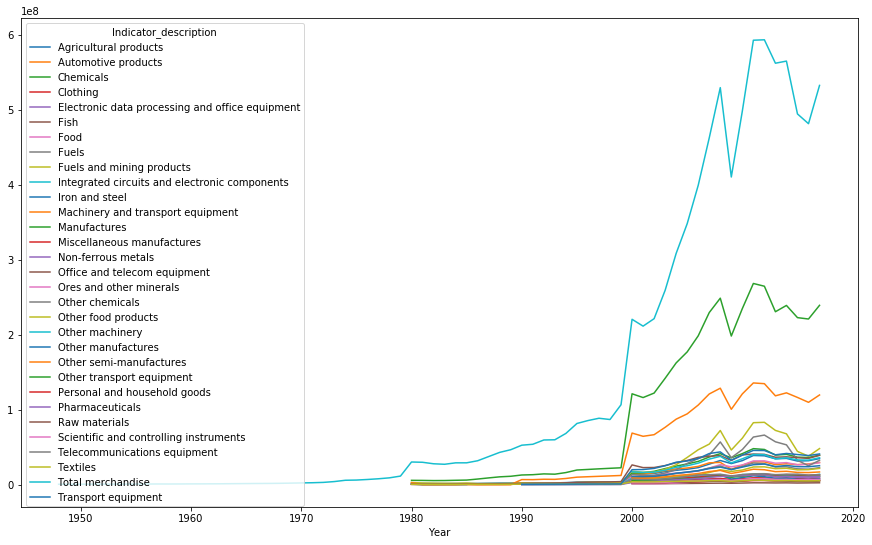

In [13]:
grouped_by_year_merch = data.groupby(['Year', 'Indicator_description']).sum()
grouped_by_year_merch['Value'].unstack().plot(figsize=(15,9));
# TODO piecharts

In the following graph we have plotted the total value of goods traded according to category. Now we can better understand how these values have been reported through time. For the majority of the dates in the data only total merchandise was reported. This shows that the data before 2000 is not going to be very interesting (elaborate). To better understand the distrubution of traded commodity we need to reduce the number of values we are visualizating. For now we will look at the top 10.

### Limitations of the dataset

##### Imports vs Exports
- TODO side by side bar chart of import vs export.
- Use this to explain why we are only looking at exports. 
- Theories about why they are so different
- Code that we wrote to view import vs export at the beginning.
- [REFERENCE] - the slide deck that only used exports...

First to try to overcome the import export issue we tried to crossreference with another dataset found on kaggle.
This did not work because kaggle dataset only had between 2 - 10% of the reported flows of our dataset, and about 99 different categories. We decided to abandon this data set and only focus on export data.

Once we made this decision the form of our dataset changed significantly limiting the potential problems we could solve. Now we have a directed network with x amount of nodes. Also we had weighted edges and our reserach showed that lots of graph analysis focuses on unweighted edges.

##### Aggregates
- TODO show a pie chart.

These aggregated values also limit what we can do with the data. Recall that a lot of our potential questions revolved around geography and network properties. Given that many countires trade to aggregated conglomorates we are unable to answer those types of questions. Therefore we decided to focus on getting a broad overview of the dataset instead of a deep dive into a particular problem. We hope that doing so will provide a survery of data mining techniques and how they apply to directed graphs with flows. We hope that the lessons we learn can be reapplied to other networks with directed flows. ..... maybe some research on how to re apply what we have done .... electric grids, traffic flows (importance of intersection, competetion).... ?

## Approaches we took, what we learned, how to reapply them, past research

### Page ranks
- (plus linear regressing)
- plot degree vs page rank...
- plot weighted vs non weighted page rank
- take top 10 in weighted one, see where they are in non weighted one


### Assocation Rule mining

### Degree
- applying seemingly simple statistics to a graph can reveal surprising things.
- visualization
- really weird
- certain commodities are exported to the same people the same amount of times..... have pretty much the exact same degree..... and same partners..... and the commodities
    - the these commodities are the same ones that have no import data
    - mention this as potential future work
    

### Competition Stuff


### Similarity Matrix
- create similarity matrix for top 10 (ish) page ranks
- compare sim rank, association rule mining, competition proxy
- (could validate competition approach.... :) )


### Counting triangles?
- plot through time
- analysis of networks as opposed to nodes
- does it decrease in response to certain things?
    - if we assume reporting is getting better, this should increase unless the network is truely becoming less interconnected

In [5]:
# data_exports = data[data['']]
data_exports = data[data['Flow_Description'] == 'Exports']

In [4]:
###

,Reporter_code,Reporter_description,Partner_code,Partner_description,Indicator_code,Indicator_description,Flow_Code,Flow_Description,Year,Unit,Value,Flag,Source_Description,Note
0,AF,Afghanistan,WL,World,TO,Total merchandise,X,Exports,1948,million USD,49.0,,WTO,
1,AF,Afghanistan,WL,World,TO,Total merchandise,X,Exports,1949,million USD,47.0,,WTO,
2,AF,Afghanistan,WL,World,TO,Total merchandise,X,Exports,1950,million USD,53.0,,WTO,
3,AF,Afghanistan,WL,World,TO,Total merchandise,X,Exports,1951,million USD,60.0,,WTO,
4,AF,Afghanistan,WL,World,TO,Total merchandise,X,Exports,1952,million USD,45.0,,WTO,


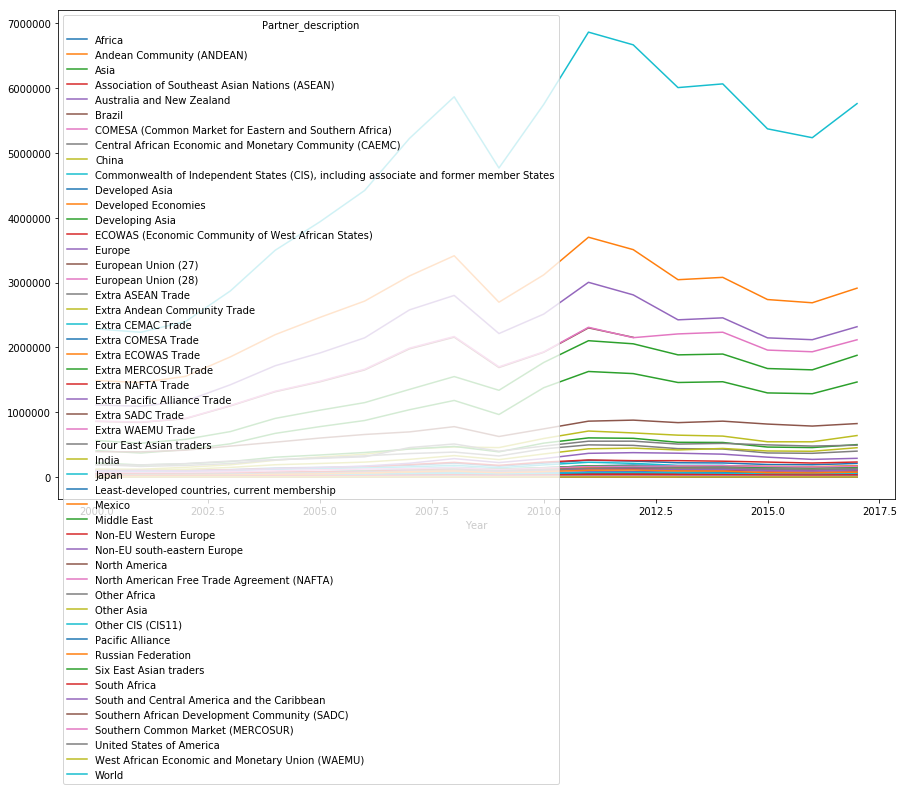

In [19]:
data_agr = data[data['Indicator_description'] == 'Other chemicals' ]
grouped_by_year_merch = data_agr.groupby(['Year', 'Partner_description']).sum()
grouped_by_year_merch['Value'].unstack().plot(figsize=(15,9));

# How do we reapply our learnings to different types of problems?
- electric grid
- supply chain management
- traffic flows
- per commodity
(this is just a sampling....)

##### Done
1. Found dataset
2. Found import data didn't match export data (show code and results)
3. Tried to crossreference dataset
4. Generic visualization to understand the data and its limitations better
5. Page Rank
    - Weight page rank
    - how different were page rank vs weighted page rank insights...
    - Visualizaitons for these
6. l....  r.....
7. Association rule mining
    - Visualization
8. World events list......
9. Competition proxy
10. Degree, plots through time, distinct groups



##### Potentials
1. Couting triangles
2. Sim rank
3. Clustering
4. Page Rank



##### Questions we had
1. how to visualize accross commodities...


##### Decided not to do
1. Clustering .... not supevised, very open to interpretation, we didn't hvae many values other than values that increase linearly....
2. Network properties .... (list these)

### list of questions for cole
- competition stuff??

In [17]:
data_agr = data[data['Indicator_description'] == 'Other food products' ]
data_agr.Reporter_description.value_counts()
# data_agr.head()
# grouped_by_year_merch = data_agr.groupby(['Year', 'Partner_description']).sum()
# grouped_by_year_merch['Value'].unstack().plot(figsize=(15,9));

Mexico                                                                                    562
United States of America                                                                  552
Brazil                                                                                    538
Developing Asia                                                                           535
Asia excluding Hong Kong re-exports                                                       535
Commonwealth of Independent States (CIS), including associate and former member States    535
Non-EU Western Europe                                                                     535
Non-EU south-eastern Europe                                                               535
World excluding Hong Kong re-exports                                                      535
Developed Asia                                                                            535
Developed Economies                                         

In [18]:
data_agr = data[data['Indicator_description'] == 'Other chemicals' ]
data_agr.Partner_description.value_counts()
# data_agr.head()
# grouped_by_year_merch = data_agr.groupby(['Year', 'Partner_description']).sum()
# grouped_by_year_merch['Value'].unstack().plot(figsize=(15,9));

World                                                                                     881
Non-EU south-eastern Europe                                                               881
Asia                                                                                      881
Non-EU Western Europe                                                                     881
India                                                                                     881
Other CIS (CIS11)                                                                         881
Four East Asian traders                                                                   881
Australia and New Zealand                                                                 881
South Africa                                                                              881
Africa                                                                                    881
Europe                                                      

Mexico                                                                                    562
United States of America                                                                  552
Brazil                                                                                    538
Developing Asia                                                                           535
Asia excluding Hong Kong re-exports                                                       535
Commonwealth of Independent States (CIS), including associate and former member States    535
Non-EU Western Europe                                                                     535
Non-EU south-eastern Europe                                                               535
World excluding Hong Kong re-exports                                                      535
Developed Asia                                                                            535
Developed Economies                                         